In [2]:
%pylab inline
import sys
sys.path.append('../code')
from mwlmc_bfe import smooth_coeff
from mwlmc_bfe import coeff_energy
from coefficients_smoothing import read_coeff_matrix

Populating the interactive namespace from numpy and matplotlib


In [3]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [4]:
# data 

covmat_lmc_path = '../data/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_covmat_sample_0'
coeff_lmc_path = '../data/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_coeff_sample_0'
mass = 1.7995383e-05


covmat_mwlmc_path = '../data/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_covmat_sample_0'
coeff_mwlmc_path = '../data/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_coeff_sample_0'


S_lmc, T_lmc, N_mw = smooth_coeff(coeff_lmc_path, covmat_lmc_path, 0, 4, 20, 20, 20, 8, mass)
S_mwlmc, T_mwlmc, N_mwlmc = smooth_coeff(coeff_mwlmc_path, covmat_mwlmc_path, 0, 4, 20, 20, 20, 4, mass)



TypeError: smooth_coeff() missing 1 required positional argument: 'snap'

In [222]:
def coeff_hist(S):
    vmin = np.ma.masked_invalid(np.log10(np.abs(S[:,:,0].flatten()))).min()
    vmax = np.max(np.log10(np.abs(S)))

    fig, ax = subplots(1, 3, figsize=(14, 4))

    fig.suptitle('LMC coefficients amplitudes', y=1.06)

    for i in range(3):
        im = ax[i].imshow(np.log10(np.abs(((S[:,:,i])))), origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
        ax[i].set_xlim(-0.5, 10)
        ax[i].set_ylim(-0.5, 10)
        ax[i].set_xlabel('$n$')
        ax[i].set_title('$m=${}'.format(i))
        if i ==0:
            ax[i].set_ylabel('$l$')
    #ax[3].set_colorbar()
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels)
    cbar.set_label(r'$\rm{Log_{10}\ S_{nlm}}$')


In [6]:
def coeff_power(S, T, fig_title, fig_name, max_m=0, max_n=0, max_l=0):
    
    vmin = np.ma.masked_invalid(np.log10((S**2 + T**2)**0.5)).min()
    vmax = np.max(np.log10((S**2 + T**2)**0.5))

    index_m = np.where(np.abs(S[:,:,:3])>0)
    if max_m==0:
        max_m = np.max(index_m[2])
    if max_n==0:
        max_n = np.max(index_m[0])
    if max_l==0:
        max_l = np.max(index_m[1])

    print(max_n, max_l)
    if max_m < 4:
        fig, ax = subplots(max_m+1, 1, figsize=(6, 9), sharex=True)
    elif ((max_m < 8) & (max_m>3)):
        fig, ax = subplots(2, 4, figsize=(14, 9), sharex=True, sharey=True)
    elif (max_m>7):
        fig, ax = subplots(3, 4, figsize=(14, 14), sharex=True, sharey=True)
    print(max_m)

    fig.suptitle(fig_title, y=1.02)

    if max_m < 5:
        for i in range(max_m+1):
            im = ax[i].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[i].set_xlim(-1, max_n+1)
            ax[i].set_ylim(-1, max_l+1)
            ax[i].set_ylabel('$l$')
            ax[i].set_title('$m=${}'.format(i))
            ax[i].set_xticks(np.arange(0, max_n+1, 2))
            ax[i].set_yticks(np.arange(0, max_l+1, 2))
            ax[i].set_yticklabels(np.arange(0, max_l+1, 2))

            if i ==2:
                ax[i].set_xlabel('$n$')
    elif (max_m>3):
        j = 0 
        k=0
        for i in range(max_m+1):
            print(j, i)
            im = ax[j][k].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[j][k].set_xlim(-1, max_n+1)
            ax[j][k].set_ylim(-1, max_l+1)
            ax[j][k].set_ylabel('$l$')
            ax[j][k].set_title('$m=${}'.format(i))
            k+=1
            if i == 2:
                ax[j][i].set_xlabel('$n$')
            elif i%3 == 0:
                j+=1 
                k=0
                
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.15, -0.05, 0.8, 0.04])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels, orientation='horizontal')
    cbar.set_label(r'$\rm{Log_{10}\ \left( S_{nlm}^2 + T_{nlm}^2 \right)}$')
    fig.tight_layout()
    fig.savefig(fig_name, bbox_inches='tight')

In [7]:
coeff_power(S_lmc, T_lmc, fig_title='LMC coefficients amplitude', fig_name='LMC_coefficients.png' ,max_n=20, max_l=8)

NameError: name 'S_lmc' is not defined

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


20 8
2


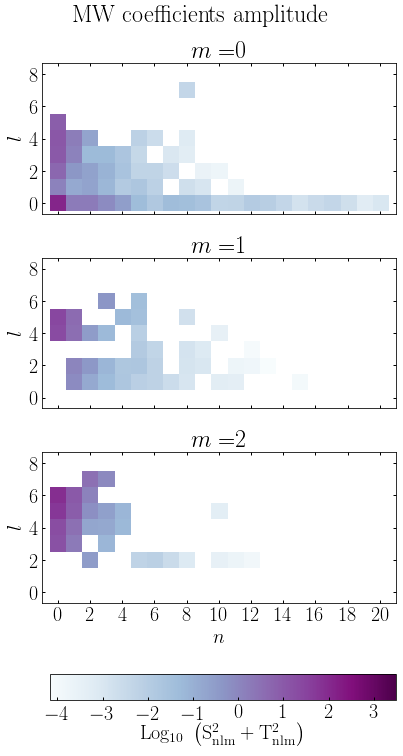

In [479]:
coeff_power(S_mwlmc, T_mwlmc, fig_title='MW coefficients amplitude', fig_name='MW_coefficients.png', max_m=2, max_n=20, max_l=8)

In [30]:
mass = 1/507925.9301774541
#mass = 1
covmat_s1 = '../data/triaxial_halos/bfe_s1_halo.txt_covmat_sample_'
coeff_s1 = '../data/triaxial_halos/bfe_s1_halo.txt_coeff_sample_'
#mass = 1

covmat_q1 = '../data/triaxial_halos/bfe_q1_halo.txt_covmat_sample_'
coeff_q1 = '../data/triaxial_halos/bfe_q1_halo.txt_coeff_sample_'
#mass = 1

covmat_t1 = '../data/triaxial_halos/bfe_t1_halo.txt_covmat_sample_'
coeff_t1 = '../data/triaxial_halos/bfe_t1_halo.txt_coeff_sample_'

covmat_sph = '../data/triaxial_halos/bfe_spherical_rs12.7_covmat_sample_'
coeff_sph = '../data/triaxial_halos/bfe_spherical_rs12.7_coeff_sample_'
#mass = 1

sn_cut = 4

S_s1, T_s1, N_s1, sn_s1 = smooth_coeff(coeff_s1, covmat_s1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_q1, T_q1, N_q1, sn_q1 = smooth_coeff(coeff_q1, covmat_q1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_t1, T_t1, N_t1, sn_t1 = smooth_coeff(coeff_t1, covmat_t1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)


S_sph1, T_sph1, N_sph1, sn_sph1 = smooth_coeff(coeff_sph, covmat_sph, 0, 11, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


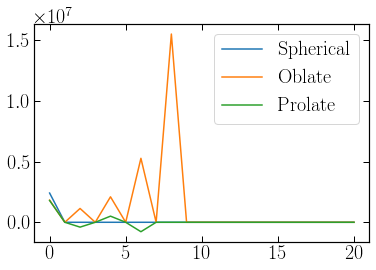

In [31]:
plot(S_sph1[0,:,0], label='Spherical')
plot(S_s1[0,:,0], label='Oblate')
plot(S_q1[0,:,0], label='Prolate')
#plot(S_t1[0,:,0], label='Triaxial')
legend()

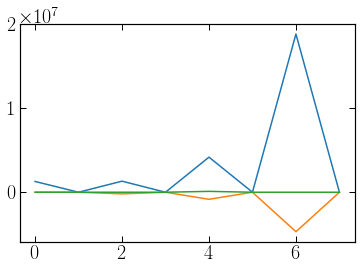

In [47]:
plot(S_t1[0,:8,0], label='Triaxial')
plot(S_t1[0,:8,2], label='Triaxial')
plot(S_t1[0,:8,4], label='Triaxial')


In [38]:
S_t1[0,:,0]

array([1.27789857e+06, 0.00000000e+00, 1.31269831e+06, 0.00000000e+00,
       4.16555725e+06, 0.00000000e+00, 1.87862140e+07, 0.00000000e+00,
       1.01314758e+08, 0.00000000e+00, 6.26474768e+08, 0.00000000e+00,
       4.12052037e+09, 0.00000000e+00, 2.92139688e+10, 0.00000000e+00,
       2.27211962e+11, 0.00000000e+00, 1.78953961e+12, 0.00000000e+00,
       0.00000000e+00])

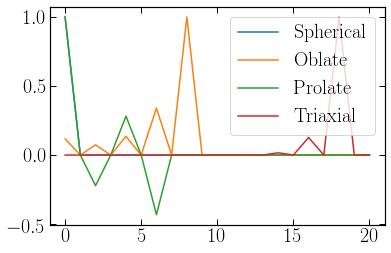

In [26]:
plot(S_sph1[0,:,0]/np.max(S_sph1[0,:,0]), label='Spherical')
plot(S_s1[0,:,0]/np.max(S_s1[0,:,0]), label='Oblate')
plot(S_q1[0,:,0]/np.max(S_q1[0,:,0]), label='Prolate')
plot(S_t1[0,:,0]/np.max(S_t1[0,:,0]), label='Triaxial')
legend()
#ylim(-1E6, 1.7E7)

#plot(S_s1[0,:,1])
#plot(S_q1[0,:,1])

#plot(S_t1[0,:,0])


In [8]:
U_s1 = coeff_energy(S_s1, T_s1, 0, 21, 21)
U_q1 = coeff_energy(S_q1, T_q1, 0, 21, 21)
U_t1 = coeff_energy(S_t1, T_t1, 0, 21, 21)
U_sph = coeff_energy(S_sph1, T_sph1, 0, 21, 21)


U_s1_2 = coeff_energy(S_s1, T_s1, 1, 21, 21)
U_q1_2 = coeff_energy(S_q1, T_q1, 1, 21, 21)
U_t1_2 = coeff_energy(S_t1, T_t1, 1, 21, 21)

TypeError: coeff_energy() missing 2 required positional arguments: 'vmin' and 'vmax'

In [457]:
A_sph = np.sqrt(S_sph1**2 + T_sph1**2)
A_s1 = np.sqrt(S_s1**2 + T_t1**2)
A_q1 = np.sqrt(S_q1**2 + T_q1**2)
A_t1 = np.sqrt(S_t1**2 + T_t1**2)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local

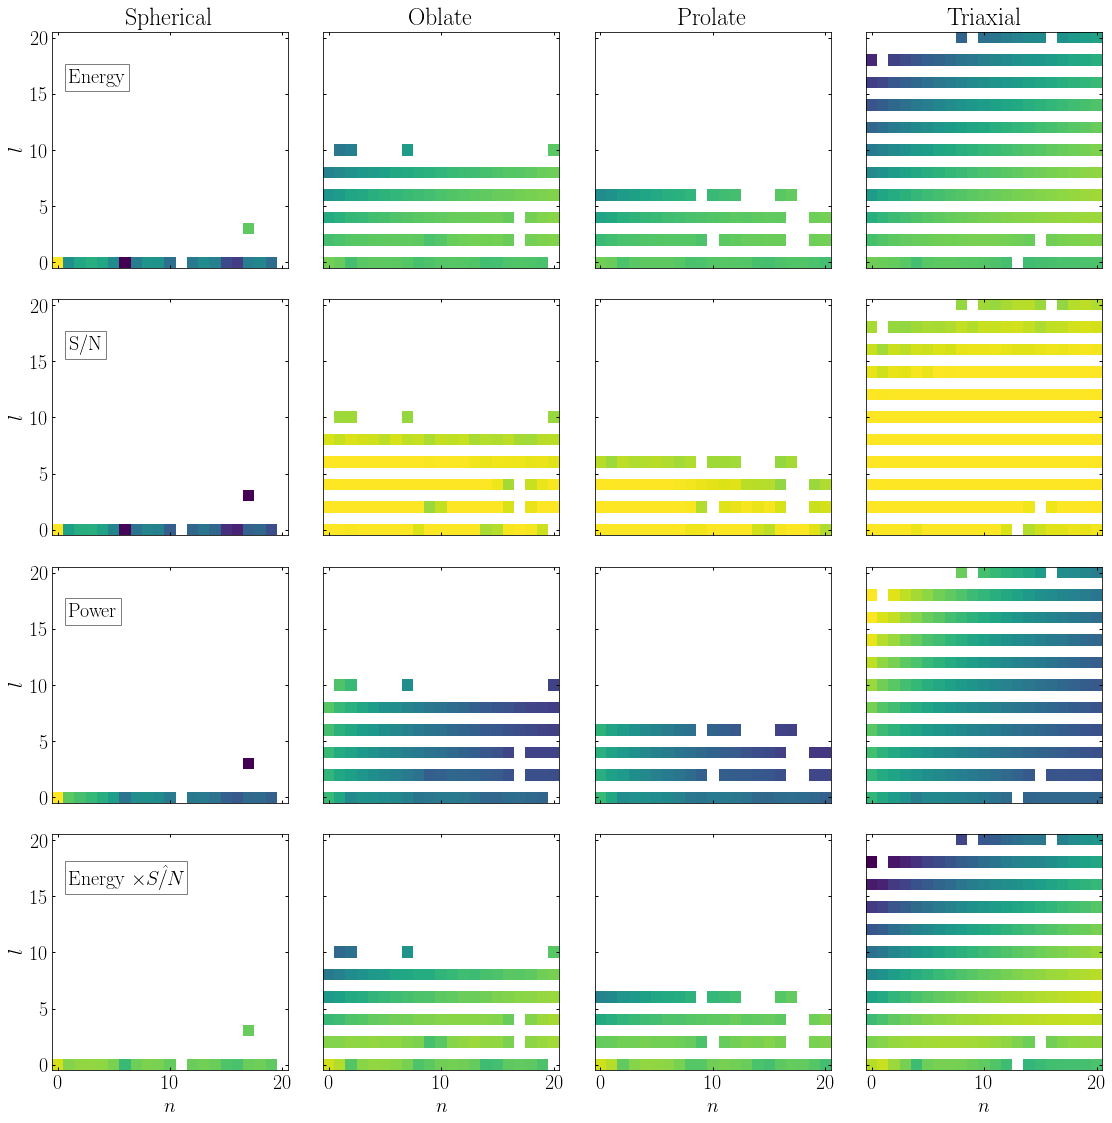

In [458]:
fig, ax = subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)

ax[0][0].imshow(np.log10(np.abs(U_sph.T)), origin='lower')
ax[0][0].set_title('Spherical')
ax[0][1].imshow(np.log10(np.abs(U_s1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][1].set_title('Oblate')
ax[0][2].imshow(np.log10(np.abs(U_q1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][2].set_title('Prolate')
ax[0][3].imshow(np.log10(np.abs(U_t1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][3].set_title('Triaxial')

ax[1][0].imshow(np.log10(np.abs(sn_sph1[:,:,0].T)), origin='lower')
ax[1][1].imshow(np.log10(np.abs(sn_s1[:,:,0].T)), origin='lower', vmin=-3, vmax=1.3)
ax[1][2].imshow(np.log10(np.abs(sn_q1[:,:,0].T)), origin='lower', vmin=-3, vmax=1.3)
ax[1][3].imshow(np.log10(np.abs(sn_t1[:,:,0].T)), origin='lower', vmin=-3, vmax=1.3)

ax[2][0].imshow(np.log10(np.abs(A_sph[:,:,0].T)), origin='lower',)
ax[2][1].imshow(np.log10(np.abs(A_s1[:,:,0].T)), origin='lower', vmin=-3.5, vmax=11)
ax[2][2].imshow(np.log10(np.abs(A_q1[:,:,0].T)), origin='lower', vmin=-3.5, vmax=11)
ax[2][3].imshow(np.log10(np.abs(A_t1[:,:,0].T)), origin='lower', vmin=-3.5, vmax=11)

ax[3][0].imshow(np.log10(np.abs(U_sph*sn_sph1[:,:,0]/np.max(sn_sph1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][1].imshow(np.log10(np.abs(U_s1*sn_s1[:,:,0]/np.max(sn_s1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][2].imshow(np.log10(np.abs(U_q1*sn_q1[:,:,0]/np.max(sn_q1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][3].imshow(np.log10(np.abs(U_t1*sn_t1[:,:,0]/np.max(sn_t1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)

ax[3][0].set_xlabel('$n$')
ax[3][1].set_xlabel('$n$')
ax[3][2].set_xlabel('$n$')
ax[3][3].set_xlabel('$n$')

ax[3][0].set_ylabel('$l$')
ax[2][0].set_ylabel('$l$')
ax[0][0].set_ylabel('$l$')
ax[1][0].set_ylabel('$l$')

ax[0][0].text(1, 16, 'Energy', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
ax[1][0].text(1, 16, 'S/N', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
ax[2][0].text(1, 16, 'Power', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
ax[3][0].text(1, 16, r'Energy $\times \hat{S/N}$', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
fig.tight_layout()
#savefig('trixial_halo_energy.pdf', bbox_inches='tight')

In [463]:
nmax=21
U_q1_n = np.zeros(nmax)
U_s1_n = np.zeros(nmax)
U_t1_n = np.zeros(nmax)
U_sph1_n = np.zeros(nmax)

U_s1_l = np.zeros(nmax)
U_q1_l = np.zeros(nmax)
U_t1_l = np.zeros(nmax)
U_sph1_l = np.zeros(nmax)

for i in range(nmax):
    U_q1_n[i] = np.sum(U_q1[:,i])
    U_s1_n[i] = np.sum(U_s1[:,i])
    U_q1_l[i] = np.sum(U_q1[i,:])
    U_s1_l[i] = np.sum(U_s1[i,:])
    U_t1_n[i] = np.sum(U_t1[:,i])
    U_t1_l[i] = np.sum(U_t1[i,:])
    U_sph1_n[i] = np.sum(U_sph[:,i])
    U_sph1_l[i] = np.sum(U_sph[i,:])

Text(0.5,0,'$l$')

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


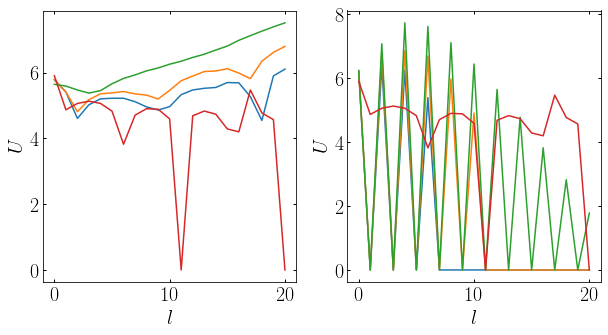

In [482]:
#plot(np.log10(np.abs(U_q1[0,:])))
#plot(np.log10(np.abs(U_s1[0,:])))
fig, ax = subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.log10(np.abs(U_q1_l)+1))
ax[0].plot(np.log10(np.abs(U_s1_l)+1))
ax[0].plot(np.log10(np.abs(U_t1_l)+1))
ax[0].plot(np.log10(np.abs(U_sph1_l)+1))

ax[0].set_ylabel('$U$')
ax[0].set_xlabel('$l$')


ax[1].plot(np.log10(np.abs(U_q1_n)+1))
ax[1].plot(np.log10(np.abs(U_s1_n)+1))
ax[1].plot(np.log10(np.abs(U_t1_n)+1))
ax[1].plot(np.log10(np.abs(U_sph1_l)+1))

ax[1].set_ylabel('$U$')
ax[1].set_xlabel('$l$')
#plot(np.log10(np.abs(U_t1[0,:])))

In [473]:
np.sum(U_s1[0,:])

-620674.0478502961

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


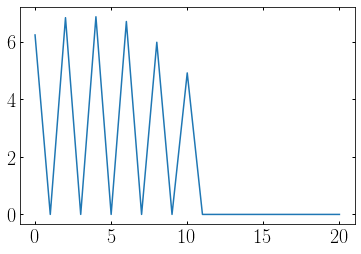

In [479]:
plot(np.log10(np.abs(U_s1_n)+1))